在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。
import unicodecsv


submissions_filename = 'project-submissions.csv'
engagement_filename = 'daily-engagement.csv'


#读取csv文件中的数据
def readCsv(fileName):
    #使用with后不管with中的代码出现什么错误，都会进行对当前对象进行清理工作。
    with open(fileName,"rb") as file:
        reader = unicodecsv.DictReader(file)
        enrollments = list(reader)
        return enrollments


daily_engagement = readCsv(engagement_filename)
project_submissions = readCsv(submissions_filename)

## 修正数据类型

In [3]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y/%m/%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'TRUE'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'TRUE'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [6]:
#####################################
#                 2                 #
#####################################


## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
len(enrollments) #学生数


1640

In [7]:
#计算独立学生的数量，使用set的特性来做
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)

1302

In [8]:
len(daily_engagement)#上课数

136240

In [9]:
unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
len(unique_engagement_students)

1237

In [10]:
len(project_submissions)#项目提交人数


3642

In [11]:
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

## 数据中的问题

In [12]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for engagement_record in daily_engagement:
    #等于说这里是先搞了一个新的key来存放，然后又原原来的删了
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]



In [13]:
print daily_engagement[0]['account_key']

0


## 缺失的互动（Engagement）记录

In [14]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for enrollment in enrollments:
    studentaccount = enrollment['account_key']#取出账户
    if studentaccount not in unique_engagement_students: #注意要比对的是互动组的数据
        print enrollment
        break


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [15]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
#检查一下在注册表中出现，但是没在互动表中出现的学生，并且注册天数超过一天的
num_problem_students = 0
for enrollment in enrollments:
    studentaccount = enrollment['account_key']#取出账户
    if (studentaccount not in unique_engagement_students and
            enrollment['join_date'] != enrollment['cancel_date']): #注意要比对的是互动组的数据
        num_problem_students += 1
        print enrollment

print num_problem_students


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## 追踪剩余的问题

In [16]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print enrollments[0]
len(udacity_test_accounts)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}


6

In [17]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [19]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。
paid_students ={}
for enrollment in non_udacity_enrollments: #注意这里使用的是筛选完以后的数据
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        #因为可以注册多次，所以保存最近的日期
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
print len(paid_students)

995


## 获取第1周的数据
获取第1周的数据

In [28]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [29]:
#移除试用期取消的数据，也就是在原始数据中干掉非付费用户
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [30]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)


1293
134549
3618


In [31]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:#互动 且付费的人数据
    
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key] #获取付费日期
    engagement_record_date = engagement_record['utc_date'] #收集数据的日期

    if within_one_week(join_date, engagement_record_date): #如果收集数据和注册的时间之差不超过一周，就是我们想要的数据
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)


6919

## Exploring Student Engagement

In [32]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

#所以这里的数据格式为，字典，key是字符串，value为list
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key'] #获取账号
    engagement_by_account[account_key].append(engagement_record) #存储账号，value则是该条交互记录

In [33]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    #遍历该学生的所有记录，累计时间
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [34]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.7083267526693
Standard deviation: 412.99693340985726
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [35]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
#用于记录最大学习时间的人
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
#打印出来最长时间的学生的信息
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.5193397, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.6339233, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.0189037, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_courses_vi

## 第1周完成的课程数（Lessons）

In [45]:
from collections import defaultdict


def getValuesBykey(data, key_name):
    #所以这里的数据格式为，字典，key是字符串，value为list
    values_by_key = defaultdict(list)
    #遍历源数据
    for values in data:
        key = values[key_name] #获取账号
        values_by_key[key].append(values)
    return values_by_key

In [46]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
from collections import defaultdict

## 获取所有学生的某个字段的值
def getStudentSomeValue(data,field_name):
    total_value_by_account = {}
    for key, data_points in data.items():
        totalValue = 0
        #遍历该学生的所有记录，累计key对应的值
        for data_point in data_points:
            totalValue += data_point[field_name]
            total_value_by_account[key] = totalValue
    return total_value_by_account


In [64]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#描述数据
def describeData(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    #创建一个直方图来显示数据
    plt.hist(data)
    

Populating the interactive namespace from numpy and matplotlib


Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


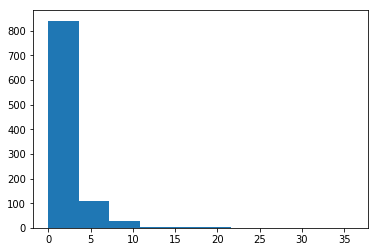

In [65]:
#提取原始数据中，account_key一致的条目
engagement_by_account = getValuesBykey(paid_engagement_in_first_week,'account_key')
#提取各个account_key的某个字段值的和
total_lesson_complete_by_account = getStudentSomeValue(engagement_by_account,'lessons_completed')
#学生们课程数形成的集合
total_lesson  = total_lesson_complete_by_account.values()
describeData(total_lesson)

## 第1周的访问次数

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


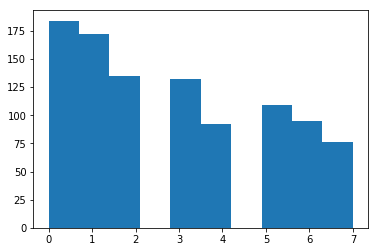

In [66]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。
#标记上课和没上课的日子
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['is_visited'] = 1
    else:
        engagement_record['is_visited'] = 0

#分组，求和，描述数据
lesson_day_data = getValuesBykey(paid_engagement_in_first_week,'account_key')
total_lesson_day_data = getStudentSomeValue(engagement_by_account,'is_visited')
total_lesson_day = total_lesson_day_data.values()
describeData(total_lesson_day)


## 区分项目通过的学生

In [67]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']#这是第一个项目的code

pass_subway_project = set()#这里使用set防止重复

#先去项目提交表中，查找提交了项目，并且通过的人的账号
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)


647

In [68]:
passing_engagement = []
non_passing_engagement = []
#再去第一周的互动报告表中，使用account_key去进行比对
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## 对比两组学生数据

Mean: 394.5860464829397
Standard deviation: 448.4995193296013
Minimum: 0.0
Maximum: 3564.7332645


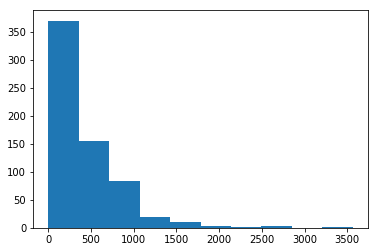

In [69]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。

#计算通过项目学生的平均时长及其他指标
passing_minute_data = getValuesBykey(passing_engagement,'account_key')
total_passing_minute_data = getStudentSomeValue(passing_minute_data,'total_minutes_visited')
total_passing_minute = total_passing_minute_data.values()
describeData(total_passing_minute)


Mean: 143.32647426564367
Standard deviation: 269.5386190075491
Minimum: 0.0
Maximum: 1768.5227493


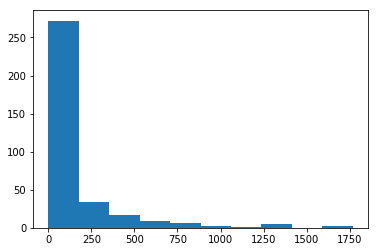

In [70]:
#计算没通过项目学生的平均时长及其他指标
non_passing_minute_data = getValuesBykey(non_passing_engagement,'account_key')
total_non_passing_minute_data = getStudentSomeValue(non_passing_minute_data,'total_minutes_visited')
total_non_passing_minute = total_non_passing_minute_data.values()
describeData(total_non_passing_minute)

In [77]:
#测试看一下官方给的答案
passing_engagement_by_account = getValuesBykey(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = getValuesBykey(non_passing_engagement,
                                               'account_key')

non-passing students:is_visited
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7


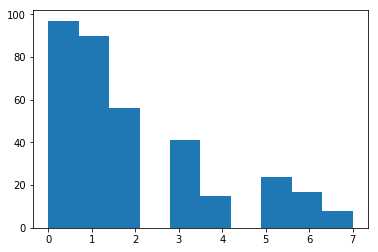

In [78]:
print 'non-passing students:is_visited'
non_passing_visits = getStudentSomeValue(
    non_passing_engagement_by_account, 
    'is_visited'
)
describeData(non_passing_visits.values())

passing students:is_visited
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


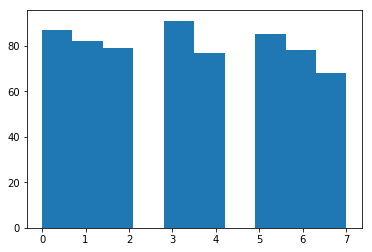

In [81]:
print 'passing students:is_visited'
passing_visits = getStudentSomeValue(
    passing_engagement_by_account,
    'is_visited'
)
describeData(passing_visits.values())
# print passing_visits.values()

non-passing students:total_minutes_visited
Mean: 143.32647426564367
Standard deviation: 269.5386190075491
Minimum: 0.0
Maximum: 1768.5227493


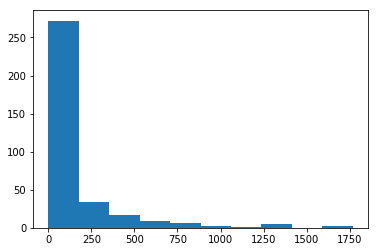

In [75]:
print 'non-passing students:total_minutes_visited'
non_passing_minutes = getStudentSomeValue(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describeData(non_passing_minutes.values())


passing students:total_minutes_visited
Mean: 394.5860464829397
Standard deviation: 448.4995193296013
Minimum: 0.0
Maximum: 3564.7332645


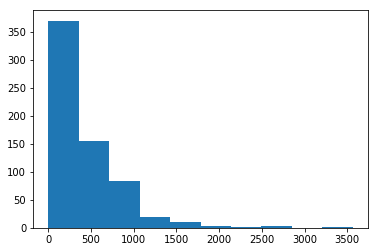

In [76]:
print 'passing students:total_minutes_visited'
passing_minutes = getStudentSomeValue(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describeData(passing_minutes.values())

non-passing students:lessons_completed
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


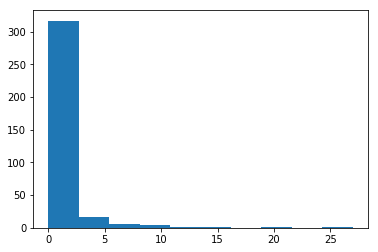

In [73]:
print 'non-passing students:lessons_completed'
non_passing_lessons = getStudentSomeValue(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describeData(non_passing_lessons.values())

passing students:lessons_completed
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


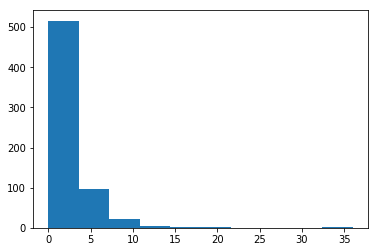

In [74]:


print 'passing students:lessons_completed'
passing_lessons = getStudentSomeValue(
    passing_engagement_by_account,
    'lessons_completed'
)
describeData(passing_lessons.values())

## 制作直方图

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

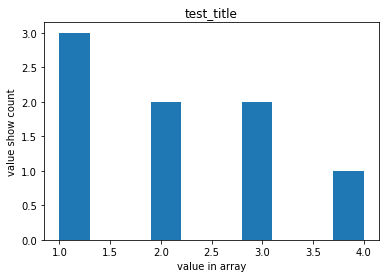

In [89]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
#添加x轴和y轴的标签
plt.xlabel("value in array")
plt.ylabel("value show count")
plt.title("test_title")
plt.hist(data)

In [ ]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

## 改进图表及分享发现

In [94]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #使用seaborn美化直方图,直接导入即可优化图形
#描述数据
def describeDataWithGoodLook(data,tittle,xLabel,yLabel):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    
    plt.title(tittle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    
    #创建一个直方图来显示数据
    plt.hist(data, bins = 37)#确直方图有20个分组
    

Populating the interactive namespace from numpy and matplotlib


Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


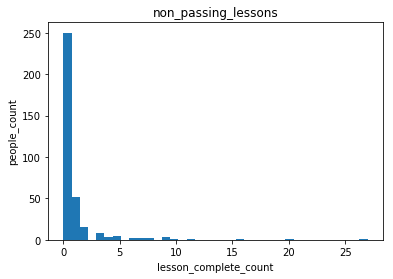

In [95]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。
describeDataWithGoodLook(non_passing_lessons.values(),"non_passing_lessons","lesson_complete_count","people_count")

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


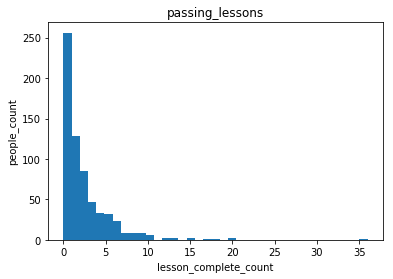

In [96]:
describeDataWithGoodLook(passing_lessons.values(),"passing_lessons","lesson_complete_count","people_count")